In [1]:
import jax
import jax.numpy as jnp

from cardiax import fk, ode
from cardiax.fk import params
from cardiax.ode.conditions import neumann
from cardiax.ode import stimulus
from deepx import generate
import functools
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [22]:
rng = jax.random.PRNGKey(12)
shape = (1200, 1200)
state = fk.solve.init(shape)
boundary = neumann()
parameter_set = params.PARAMSET_5
diffusivity = generate.random_diffusivity(rng, shape)
stimuli = [
    stimulus.linear(
        shape, stimulus.Direction.SOUTH, 0.2, 2.0, stimulus.Protocol(0, 2, 1e9)
    )
]
dx = 0.01
dt = 0.01

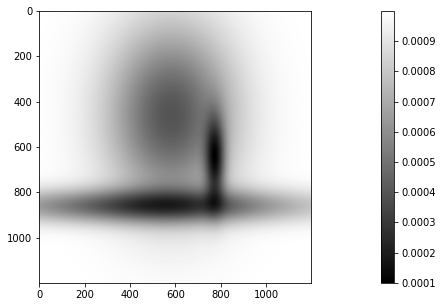

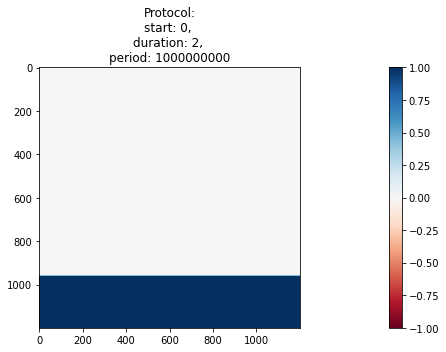

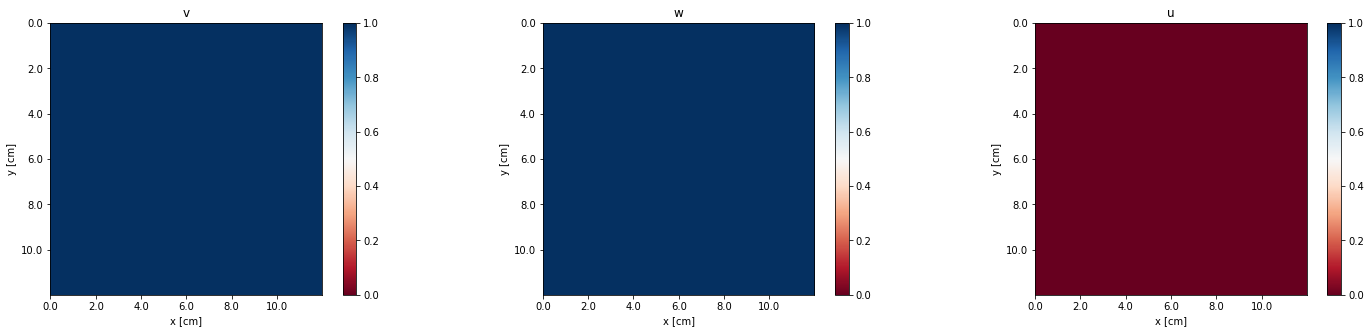

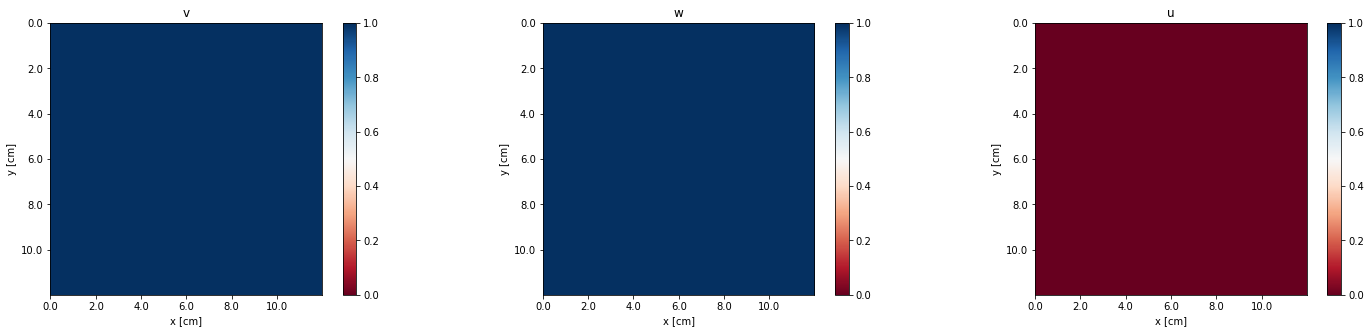

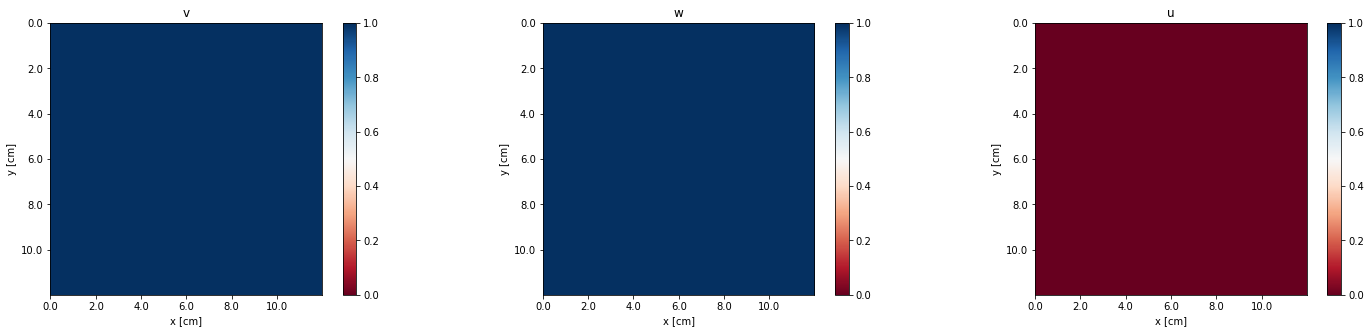

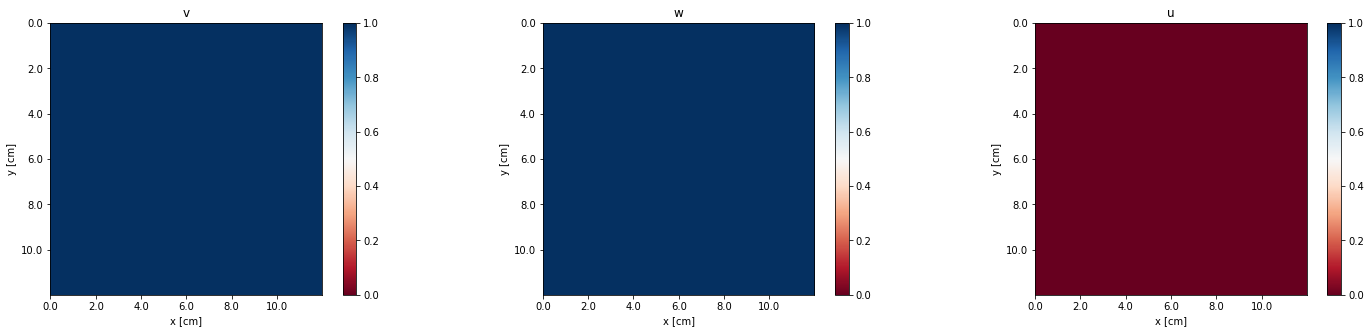

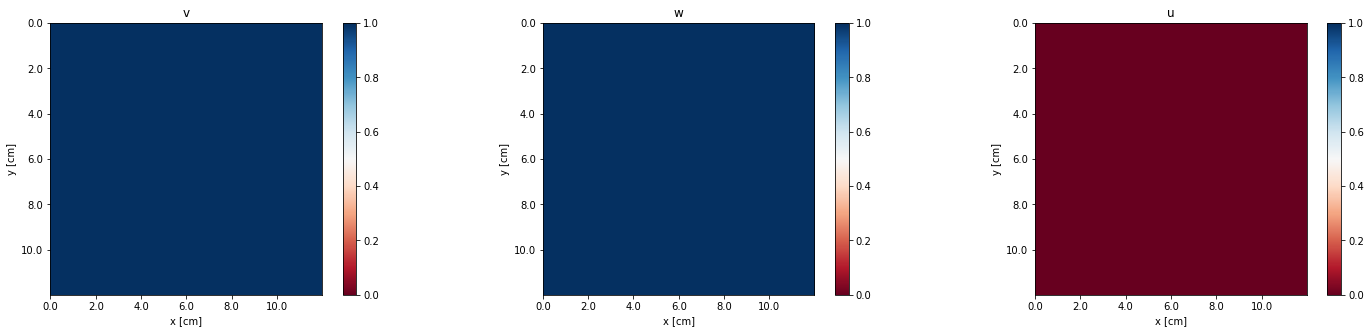

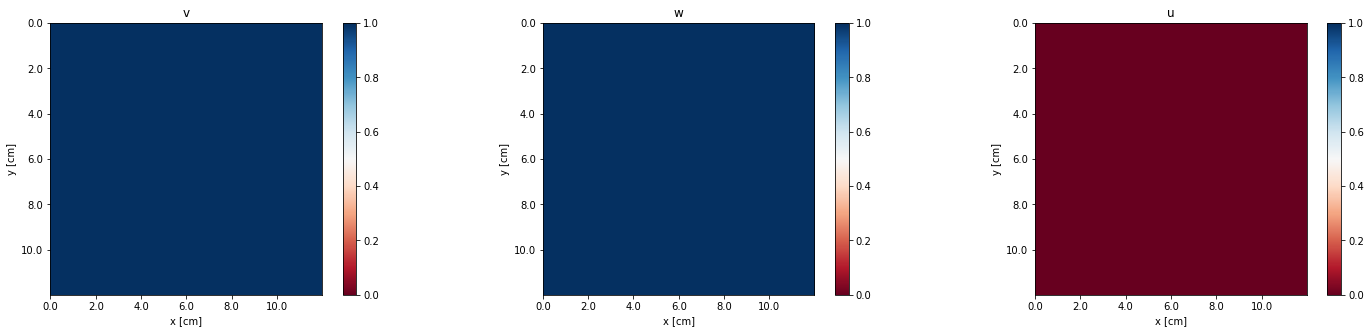

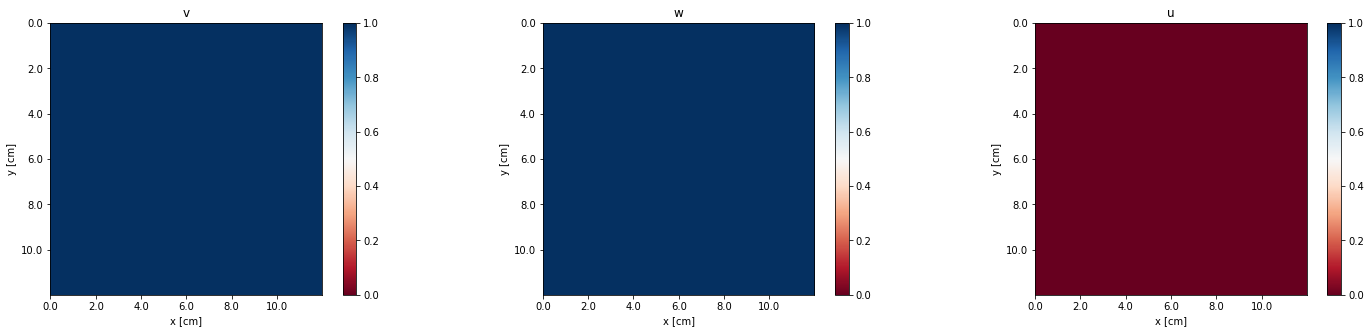

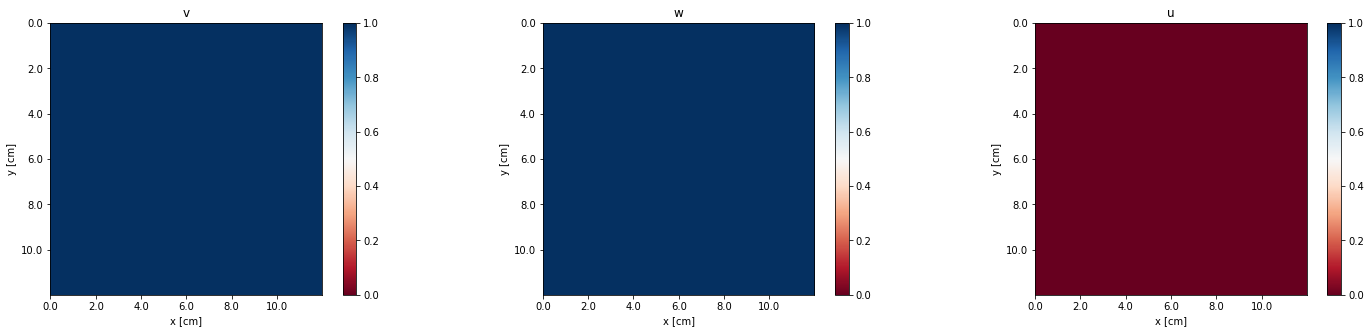

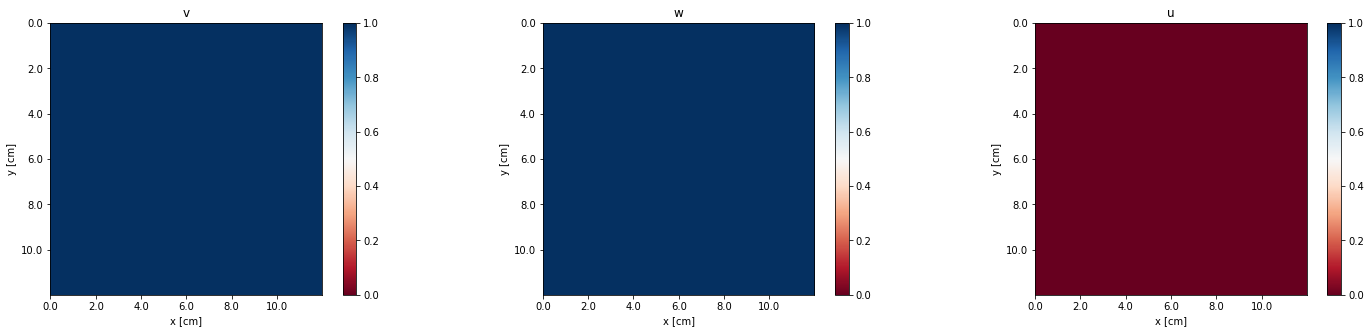

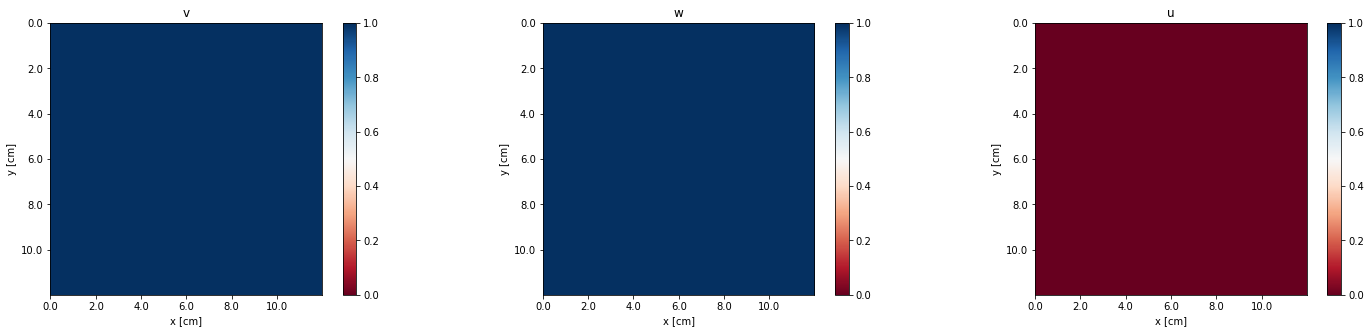

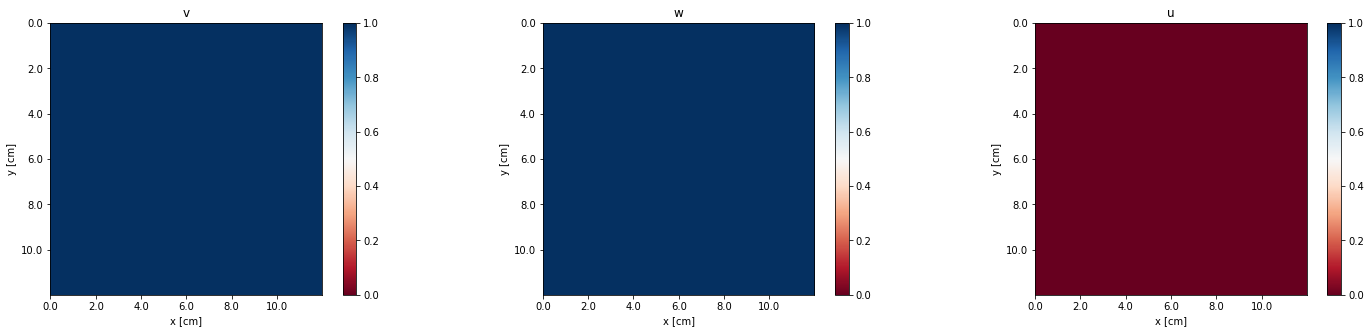

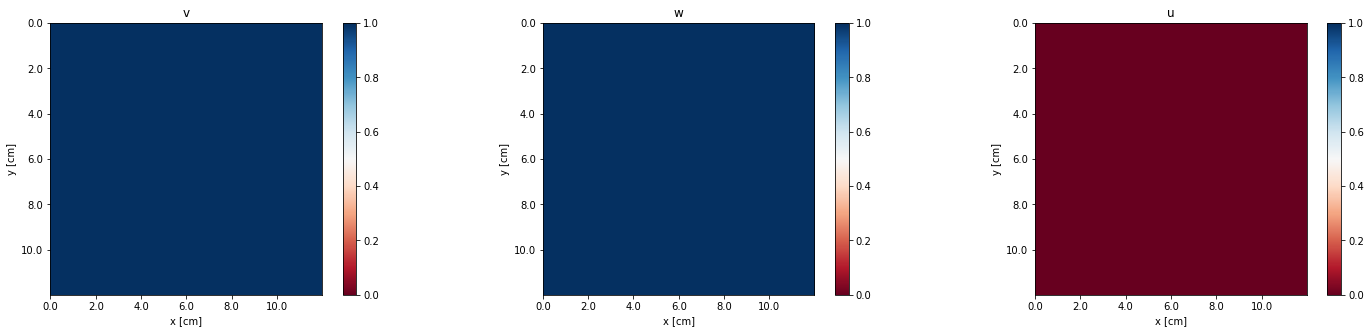

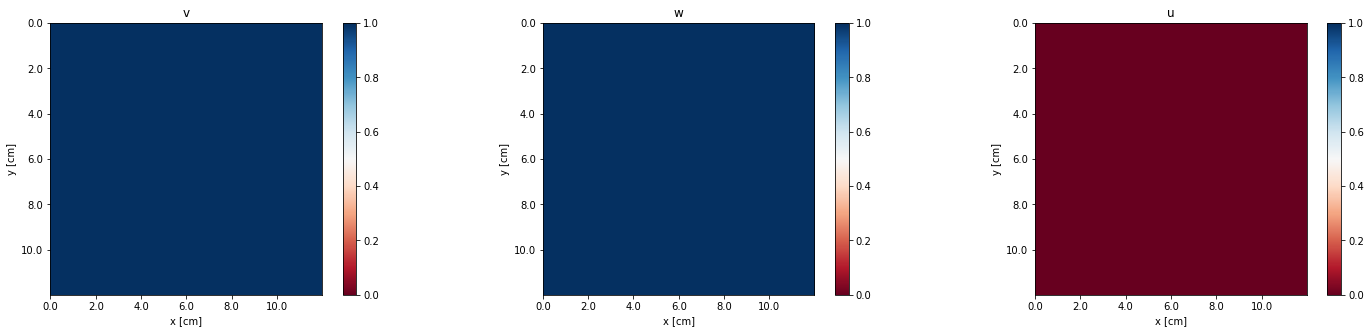

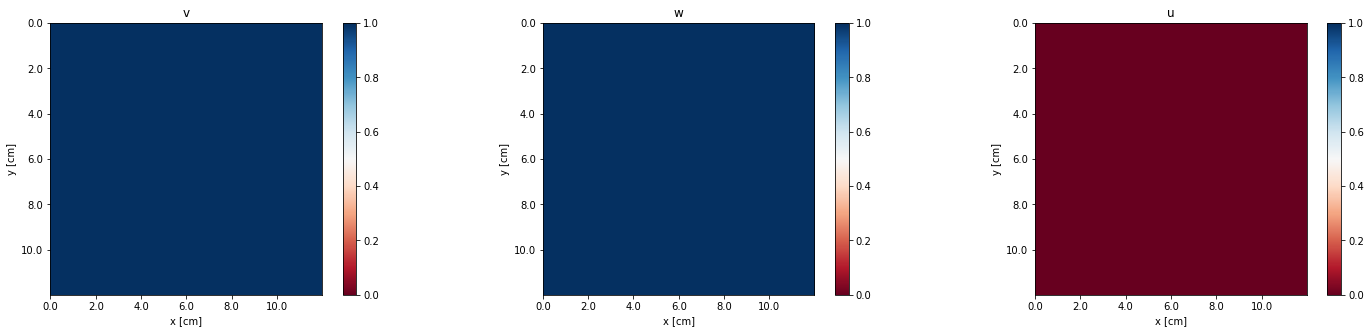

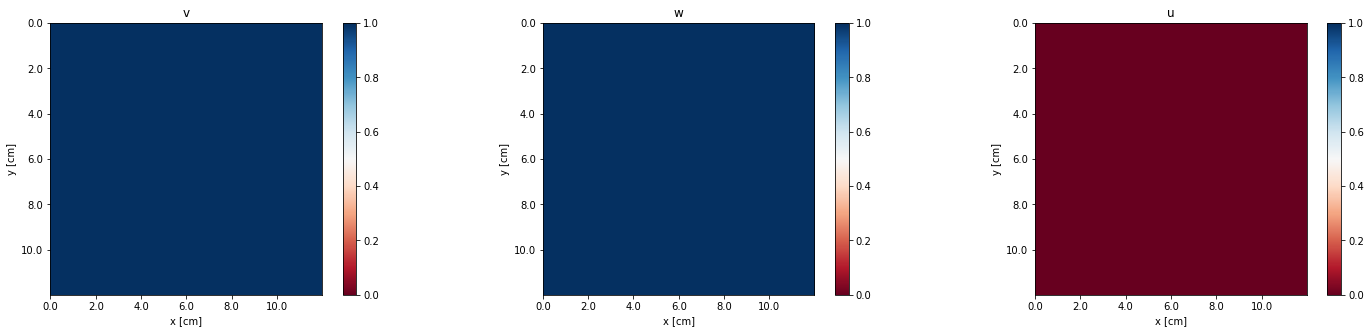

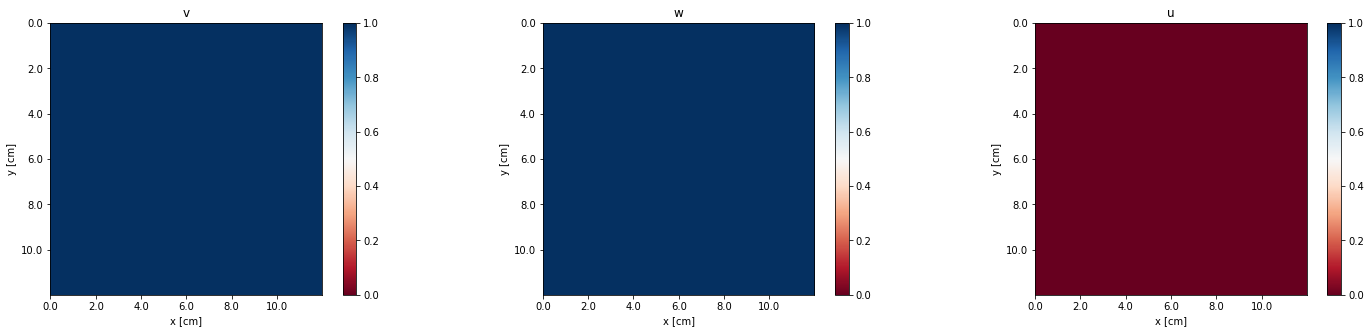

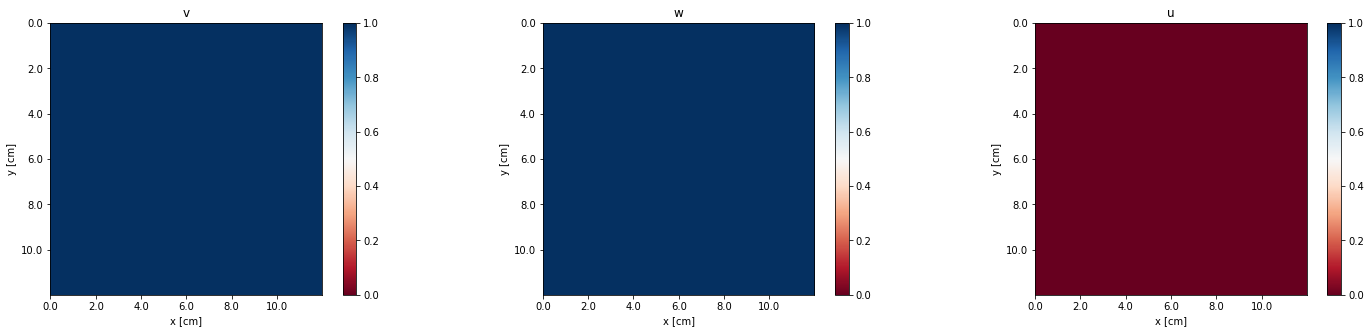

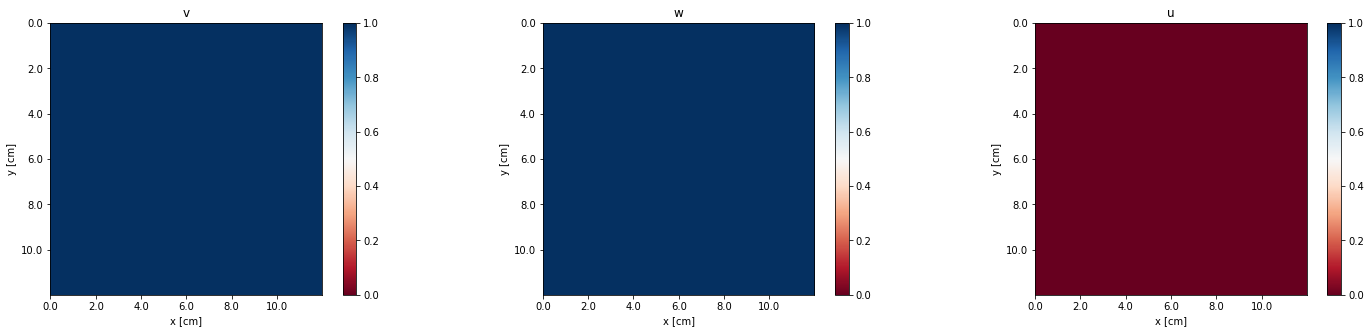

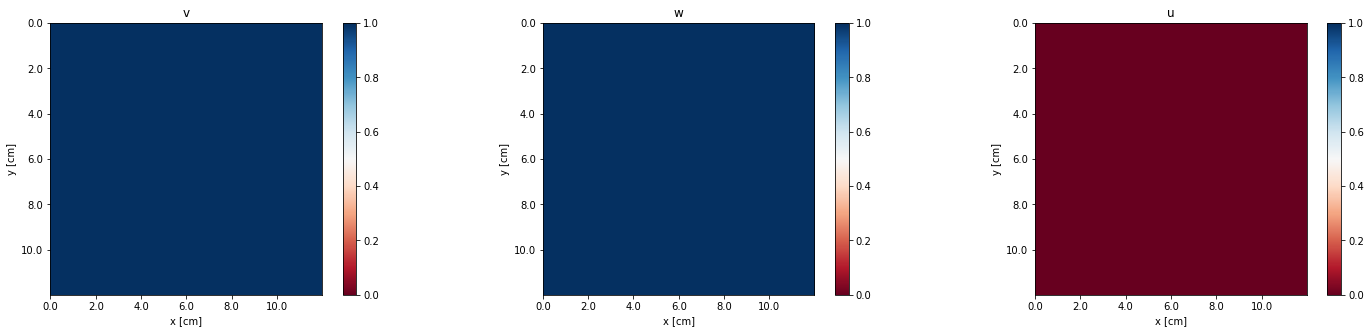

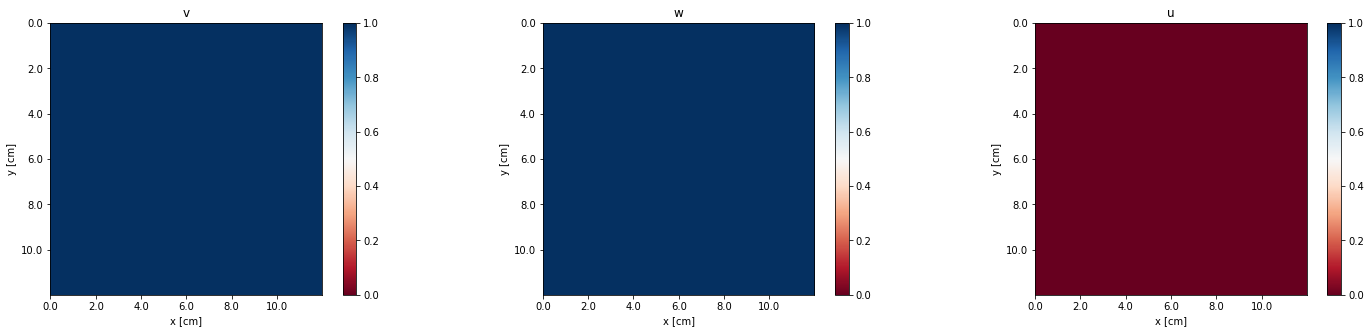

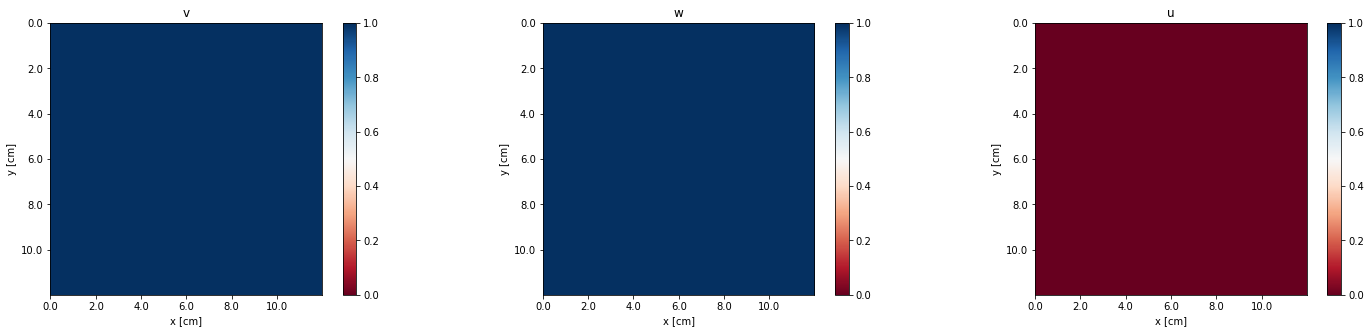

KeyboardInterrupt: 

In [7]:
# test
ode.solve.forward(
    fk.solve.step,
    state,
    jnp.arange(0, 50000, 1200),
    boundary,
    parameter_set,
    diffusivity,
    stimuli,
    dt,
    dx,
    plot=True,
)

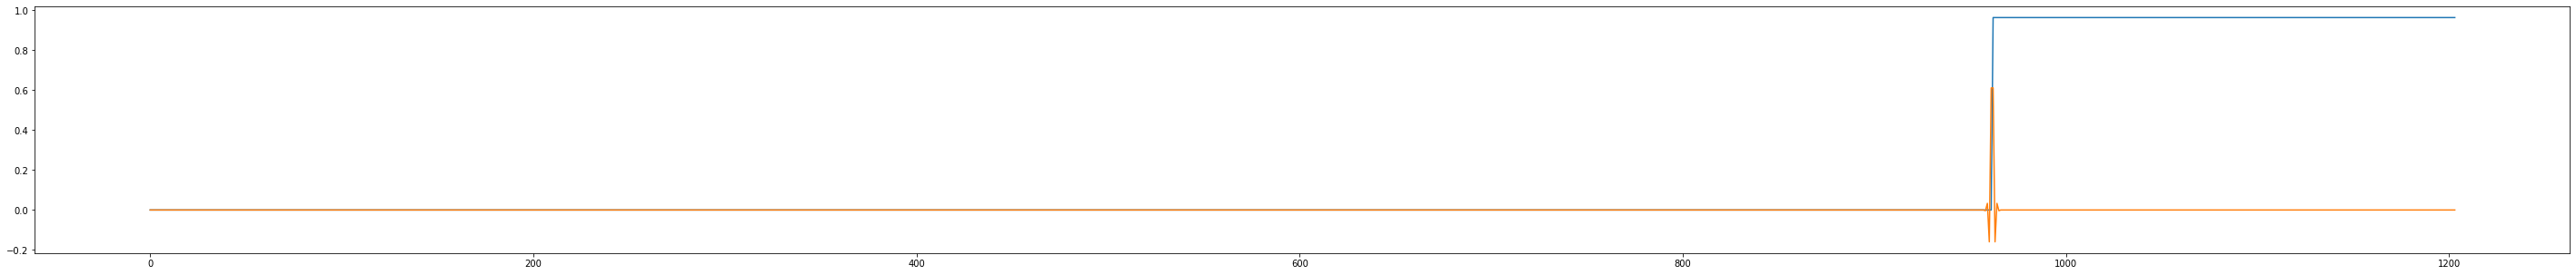

In [27]:
from cardiax.ode.grads import findiff

a = jnp.tanh(stimuli[0].field)
a = jnp.pad(a, 2, mode="edge")


a_x = findiff.first683(a[:, 0])[0]
# plt.plot(a[:, 0])
plt.figure(figsize=(50, 5))
plt.plot(a[:, 0])
plt.plot(a_x)
plt.show()

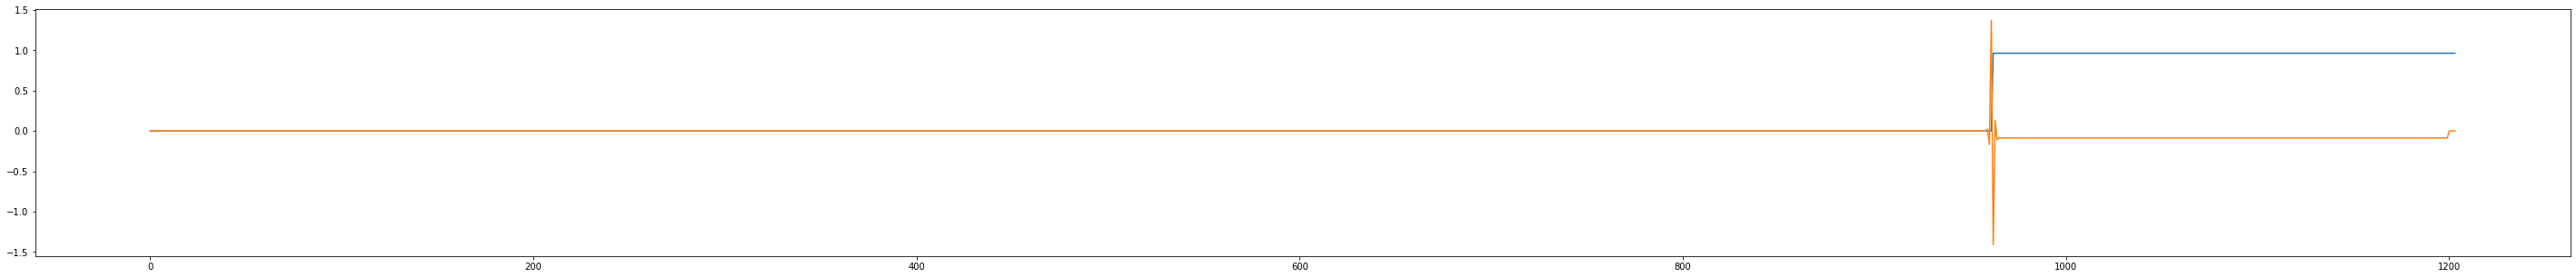

In [32]:
a_xx = findiff.second682(a[:, 0])[0]


plt.figure(figsize=(50, 5))
plt.plot(a[:, 0])
plt.plot(a_xx)
plt.show()

/home/epignatelli/anaconda3/envs/cardiax/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


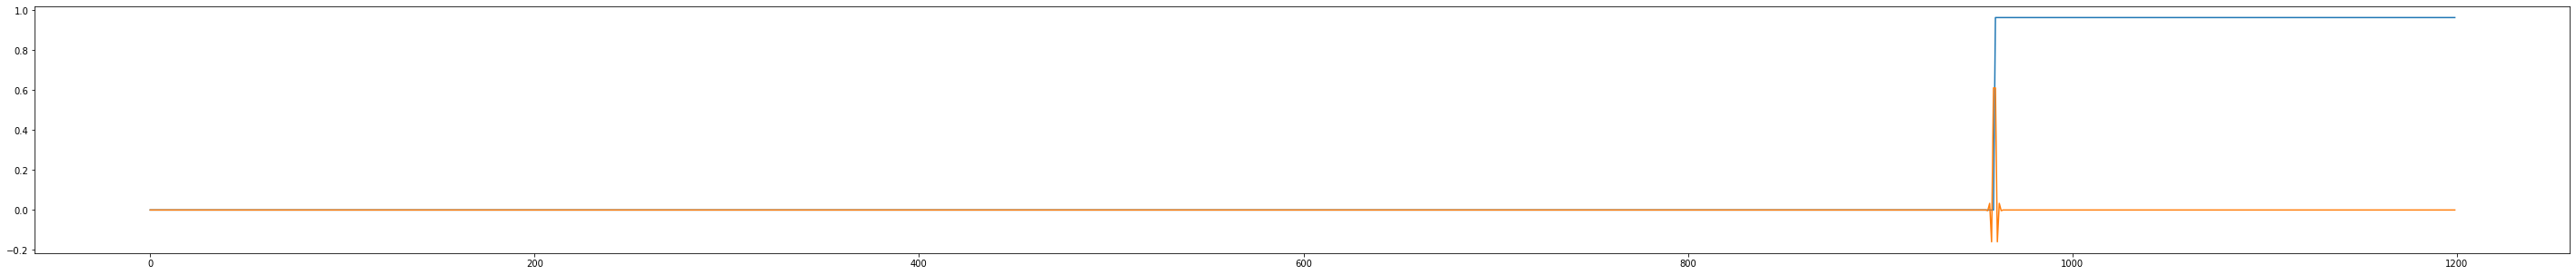

In [37]:
from cardiax.ode.grads import findiff, spectral

v = jnp.tanh(stimuli[0].field)[:, 0]


a_x_fd = findiff.first683(v)[0]
a_x_fft = spectral.first(v)[0]
plt.figure(figsize=(50, 5))
plt.plot(v)
plt.plot(a_x_fd)
plt.plot(a_x_fft)
plt.show()